In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt')

In [3]:
flavors = whisky.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors) # Pearson correlation: https://www.vietlod.com/tuong-quan-pearson-spss

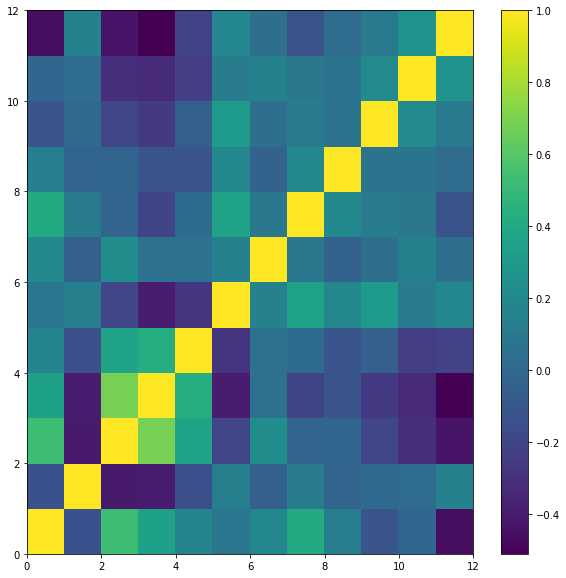

In [4]:
""" Plot the correlation between flavors"""
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

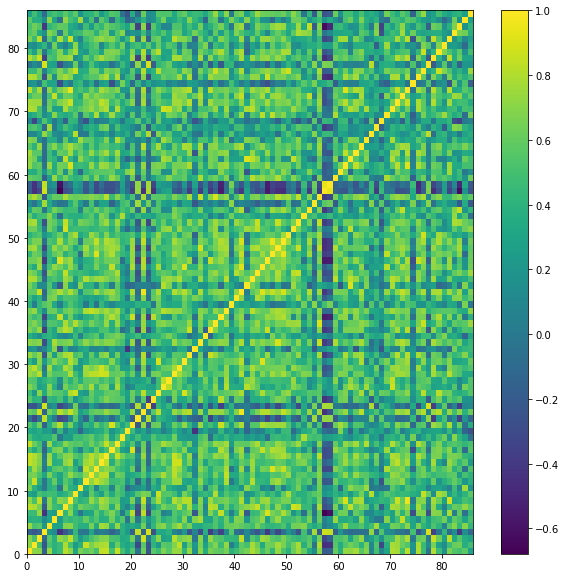

In [5]:
""" Plot the correlation between whiskies"""
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.pdf")

In [6]:
"""Clustering"""
# Adjacency Matrix: https://vi.wikipedia.org/wiki/Ma_tr%E1%BA%ADn_k%E1%BB%81
# Co-clustertin: https://www.youtube.com/watch?v=mnDC6hWWbwY
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
# print(model.rows_)
# print(np.sum(model.rows_, axis=1))
print(model.row_labels_)

[5 2 3 4 5 0 3 2 5 3 2 0 5 0 5 5 0 5 0 1 3 4 3 4 3 3 2 2 3 2 3 5 0 0 0 5 2
 3 0 1 0 3 2 2 2 0 5 0 0 3 3 2 2 2 0 1 5 4 4 0 3 5 2 5 5 2 1 5 1 0 2 5 0 5
 2 5 3 4 5 3 0 3 2 0 2 0]


In [7]:
"""Rearranged rows to get new correlations"""

# Extract the group labels from the model, append them to the whisky table
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
# Reorder the rows in increasing order by group labels
whisky = whisky.iloc[np.argsort(model.row_labels_)]
# Reset the index of DataFrame
whisky = whisky.reset_index(drop = True)

# Recalculate the correlation matrix
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
# Turn correlations into a numpy array
correlations = np.array(correlations)

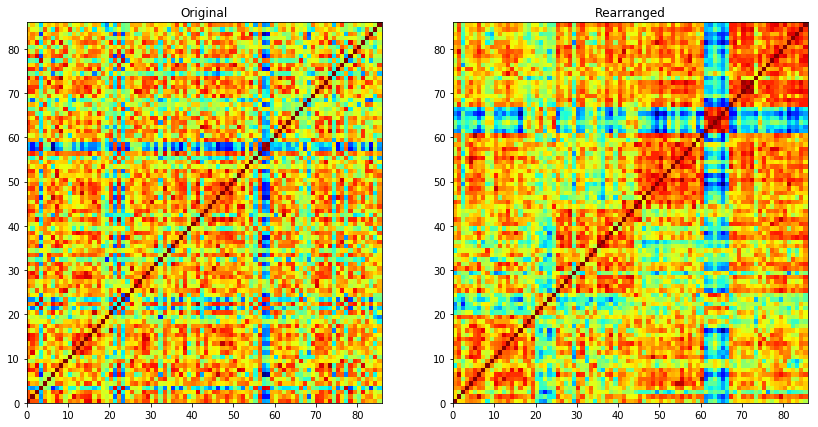

In [8]:
"""Plot the original correlations coefficients and the rearranged correlations coeffients"""
colormap = 'jet'
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky,cmap=colormap)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations,cmap=colormap)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")